Uncertainty sampling
==================

When you present unlabelled examples to an active learner, it finds you the most *useful* example and presents it for you to be labelled. This is done by first calculating the *usefulness* of prediction (whatever it means) for each example and select an instance based on the usefulness. The thing is, there are several ways to measure this. They are based upon the classification uncertainty, hence they are called *uncertainty measures*. In modAL, currently you can select from three built-in measures: *classification uncertainty*, *classification margin* and *classification entropy*. In this quick tutorial, we are going to review them. For more details, see Section 2.3 of the awesome book [Active learning by Burr Settles](http://active-learning.net/)!

In [1]:
import numpy as np

Classification uncertainty
-------------------------------------

The simplest measure is the uncertainty of classification defined by

$$U(x)=1-P(\hat{x}|x)$$

where $x$ is the instance to be predicted and $\hat{x}$ is the most likely prediction.

For example, if you have classes ``[0, 1, 2]`` and classification probabilities ``[0.1, 0.2, 0.7]``, the most likely class according to the classifier is ``2`` with uncertainty 0.3. If you have three instances with class probabilities

In [2]:
proba = np.array([[0.1 , 0.85, 0.05],
                  [0.6 , 0.3 , 0.1 ],
                  [0.39, 0.61, 0.0 ]])

the corresponding uncertainties are:

In [3]:
1 - proba.max(axis=1)

array([0.15, 0.4 , 0.39])

In the above example, the most uncertain sample is the second one. When
querying for labels based on this measure, the strategy selects the
sample with the highest uncertainty.

For this ternary classification problem, given the first two
probabilities, the classification uncertainty looks like the following.

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

from itertools import product
n_res = 100
p1, p2 = np.meshgrid(np.linspace(0, 1, n_res), np.linspace(0, 1, n_res))
p3 = np.maximum(1 - p1 - p2, 0)

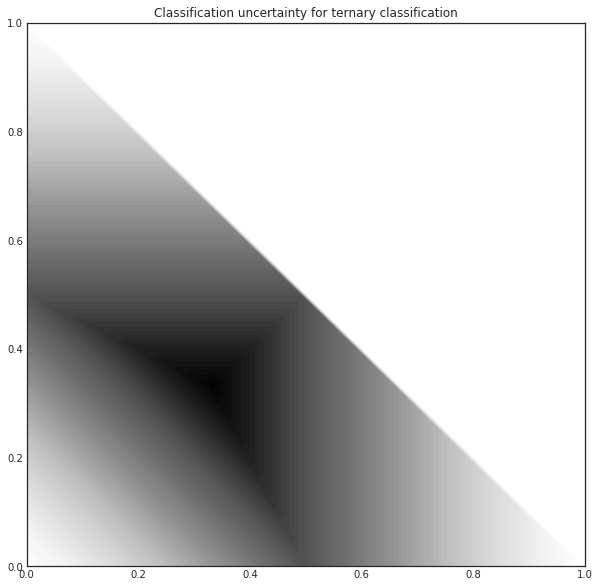

In [5]:
uncertainty = 1 - np.maximum.reduce([p1, p2, p3])

with plt.style.context('seaborn-white'):
    plt.figure(figsize=(10, 10))
    plt.contourf(p1, p2, uncertainty*((p1+p2) < 1), 100)
    plt.title('Classification uncertainty for ternary classification')

Classification margin
-------------------------------

Classification margin is the difference in probability of the first and second most likely prediction, that is, it is defined by

$$M(x)=P(\hat{x_1}|x)-P(\hat{x_2}|x)$$

where $\hat{x_1}$ and $\hat{x_2}$ are the first and second most likely classes. Using the same example we used for classification uncertainty, if the class probabilities are

In [6]:
proba = np.array([[0.1 , 0.85, 0.05],
                  [0.6 , 0.3 , 0.1 ],
                  [0.39, 0.61, 0.0 ]])

the corresponding margins are:

In [7]:
part = np.partition(-proba, 1, axis=1)
margin = - part[:, 0] + part[:, 1]

In [8]:
margin

array([0.75, 0.3 , 0.22])

When querying for labels, the strategy selects the sample with the *smallest* margin, since the smaller the decision margin is, the more unsure the decision. In this case, it would be the third sample. For this ternary classification problem, the classifier margin plotted against the first two probabilities are the following.

In [9]:
proba = np.vstack((p1.ravel(), p2.ravel(), p3.ravel())).T

part = np.partition(-proba, 1, axis=1)
margin = - part[:, 0] + part[:, 1]

margin = margin.reshape(p1.shape)

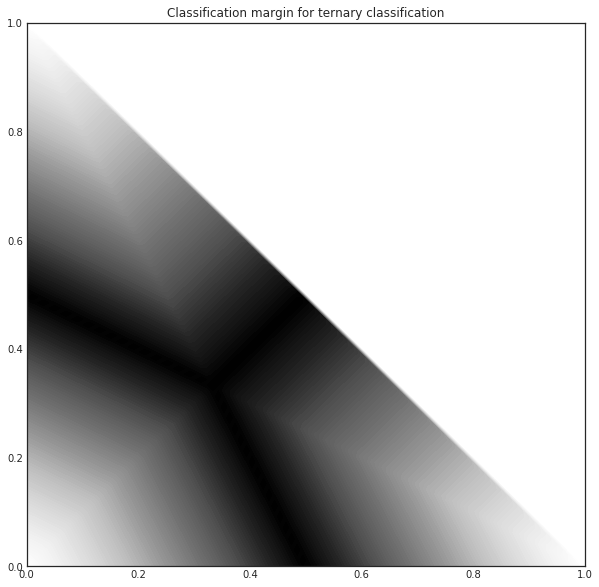

In [10]:
with plt.style.context('seaborn-white'):
    plt.figure(figsize=(10, 10))
    plt.contourf(p1, p2, (1-margin)*((p1+p2) < 1), 100)
    plt.title('Classification margin for ternary classification')

Classification entropy
--------------------------------

The third built-in uncertainty measure is the classification entropy, which is defined by

$$H(x)=-\sum_{k}p_k\log(p_k)$$

where $p_k$ is the probability of the sample belonging to the $k$-th class. Heuristically, the entropy is proportional to the average number of guesses one has to make to find the true class. In our usual example

In [11]:
proba = np.array([[0.1 , 0.85, 0.05],
                  [0.6 , 0.3 , 0.1 ],
                  [0.39, 0.61, 0.0 ]])

the corresponding entropies are

In [12]:
from scipy.stats import entropy

entropy(proba.T)

array([0.51818621, 0.89794572, 0.66874809])

The closer the distribution to uniform, the larger the entropy. Again, if we plot the entropy against the first two probabilities of a ternary classification problem, we obtain the following.

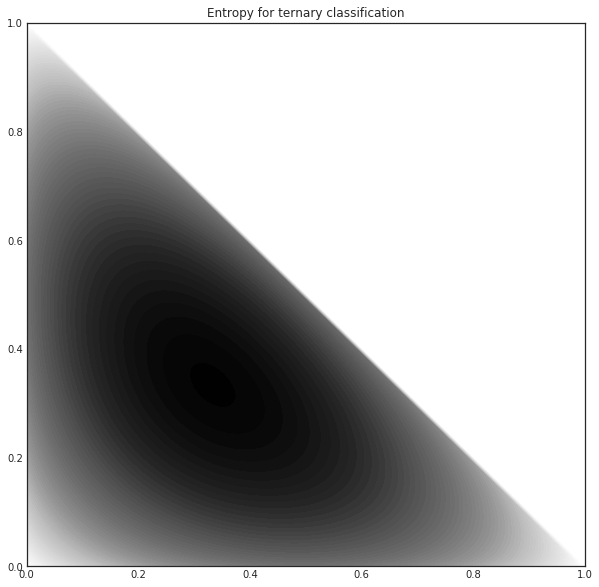

In [13]:
proba = np.vstack((p1.ravel(), p2.ravel(), p3.ravel())).T
entr = entropy(proba.T).reshape(p1.shape)

with plt.style.context('seaborn-white'):
    plt.figure(figsize=(10, 10))
    plt.contourf(p1, p2, entr*((p1+p2) < 1), 100)
    plt.title('Entropy for ternary classification')